In [75]:
!pip install imutils
!pip install easyocr

In [186]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import imutils
import easyocr
import os

In [187]:
key = cv2. waitKey(1)
webcam = cv2.VideoCapture(0)
while True:
    try:
        check, frame = webcam.read()
        cv2.imshow("Capturing", frame)
        key = cv2.waitKey(1)
        if key == ord('s'):
            path = 'D:\opencv\images'
            cv2.imwrite(os.path.join(path , 'img1.jpg'), frame)
            webcam.release()
            cv2.destroyAllWindows()
            break
        elif key == ord('q'):
            webcam.release()
            cv2.destroyAllWindows()
            break
    except(KeyboardInterrupt):
        webcam.release()
        cv2.destroyAllWindows()
        break
        

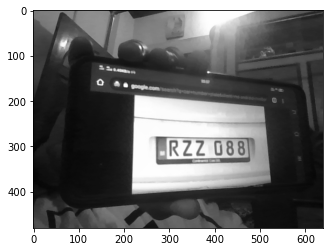

In [188]:
img = cv2.imread('D:/opencv/images/img1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

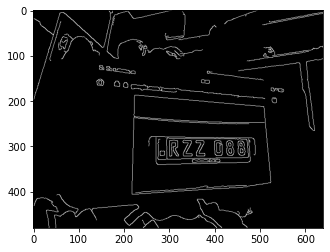

In [189]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 10, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [190]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
location

array([[[224, 187]],

       [[218, 405]],

       [[524, 380]],

       [[509, 212]]], dtype=int32)

In [191]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

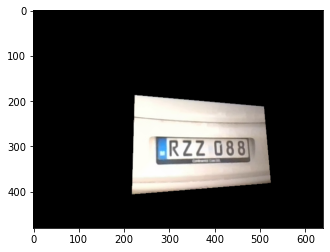

In [192]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

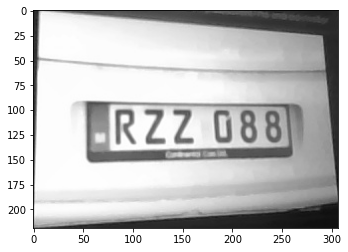

In [193]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [194]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result[0][1]

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


'RZZ 088'